## Violin Plot for high performing upsample data

In [1]:
import FunctionsAndData as fd
upsample = fd.memscore_df_upsample
fd.plot_f1_density(upsample)
fd.plot_memorization_violin(upsample)

## Comparing High performing normal vs upsampled data

/Users/ilanastern/Documents/GitHub/aiConfidential/FunctionsAndData.py:315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ilanastern/Documents/GitHub/aiConfidential/FunctionsAndData.py:316: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Normal Data Fit: y = 0.18939 * exp(-0.41774 * x) + 0.00081
Upsampled Data Fit: y = 0.20352 * exp(-0.49328 * x) + 0.00142


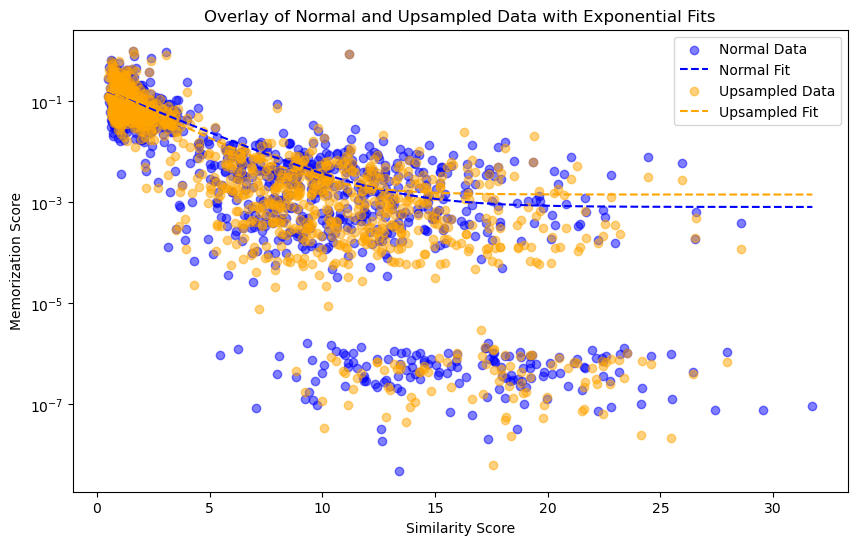

In [3]:
normal = fd.memscore_df
fd.overlay_upsample_normal(normal, upsample)

## Influnce Score Code

In [4]:
import os
import pandas as pd
import numpy as np

def calculate_influence_score(data_dir):
    all_contributions = {} #Store contributions to Dictionary

    for root, _, files in os.walk(data_dir): # Loop through each file in the directory
        for file_name in files:
            file_path = os.path.join(root, file_name)
            
            # Check if the file is a CSV file and determine the split type
            if file_name.endswith(".csv") and file_name.startswith("eval_loss_meta"):
                if root.endswith("_TR.eval"):
                    split_type = "train"
                elif root.endswith("_VL.eval"):
                    split_type = "validation"
                else:
                    continue  # Skip files that are not in _TR.eval or _VL.eval directories
                
                # Load the file
                try:
                    data = pd.read_csv(file_path)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
                    continue
            
                
                # Calculate the average F1 score for the current split
                avg_f1 = data['f1'].mean()
                
                # Contribution to F1 score for each data point
                for _, row in data.iterrows():
                    datapoint_id = row['idx']
                    f1_score = row['f1']
                    contribution = f1_score - avg_f1
                    
                    if datapoint_id not in all_contributions:
                        all_contributions[datapoint_id] = []
                    all_contributions[datapoint_id].append(contribution)
    
    # Aggregate influence scores across all files
    influence_scores = {datapoint_id: np.mean(contributions) for datapoint_id, contributions in all_contributions.items()}
    influence_scores_df = pd.DataFrame( list(influence_scores.items()), columns=['datapoint_id', 'influence_score']) # Convert to DF
    
    return influence_scores_df


data_directory = '/Users/ilanastern/Desktop/aiConfidential/data'
influence_scores_df = calculate_influence_score(data_directory)
influence_scores_df.to_csv("influence_scores.csv", index=False) # Save the results to a CSV file

## High Performing Data

/Users/ilanastern/Documents/GitHub/aiConfidential/FunctionsAndData.py:110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



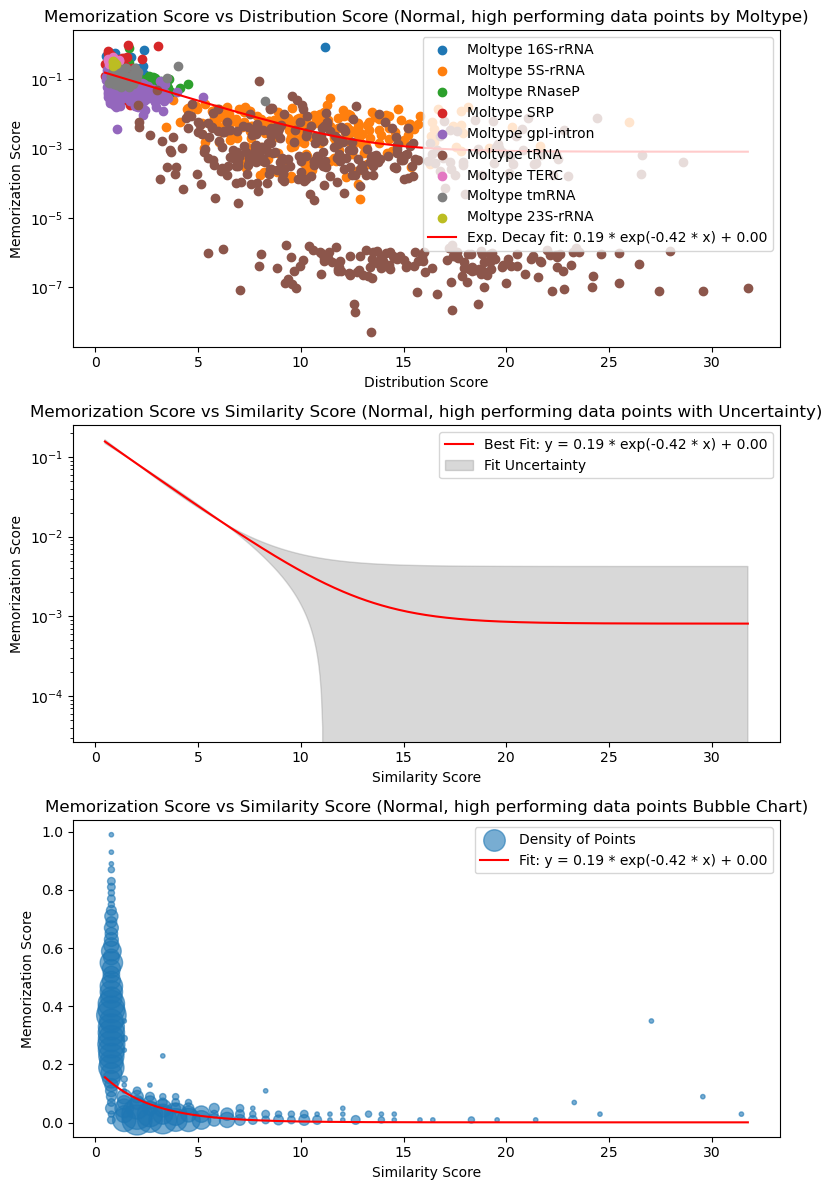

The exponential decay equation is: y = 0.19 * e^(-0.42 * x) + 0.00


In [8]:
highperformingnormal = fd.f1_above_median_per_moltype(normal)
simscore= fd.exponential_sim_scores(fd.pickle)
fd.plotter(highperformingnormal, simscore, "Normal, high performing data points")